In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
df=pd.read_csv('clustering_data.csv')
df.shape
df.head()

<ipython-input-124-fc2ba8385cdb>:1: DtypeWarning:

Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.



,CircleName,RegionName,DivisionName,OfficeName,Pincode,OfficeType,Delivery,District,StateName,Latitude,Longitude
0,Andhra Pradesh Circle,Kurnool Region,Hindupur Division,Peddakotla B.O,515631,BO,Delivery,ANANTAPUR,ANDHRA PRADESH,14.5689,77.85624
1,Andhra Pradesh Circle,Kurnool Region,Hindupur Division,Pinnadhari B.O,515631,BO,Delivery,ANANTAPUR,ANDHRA PRADESH,14.5281,77.857014
2,Andhra Pradesh Circle,Kurnool Region,Hindupur Division,Yerraguntapalle B.O,515631,BO,Delivery,ANANTAPUR,ANDHRA PRADESH,14.561111,77.85715
3,Andhra Pradesh Circle,Kurnool Region,Hindupur Division,Obulareddipalli B.O,515581,BO,Delivery,ANANTAPUR,ANDHRA PRADESH,14.2488,78.2588
4,Andhra Pradesh Circle,Kurnool Region,Hindupur Division,Odulapalli B.O,515581,BO,Delivery,ANANTAPUR,ANDHRA PRADESH,14.24555,78.2477


In [ ]:
#Extracting Home State i.e., Telangana State's data
hs_data=df[df.StateName=='TELANGANA']

hs_data.head()

,CircleName,RegionName,DivisionName,OfficeName,Pincode,OfficeType,Delivery,District,StateName,Latitude,Longitude
138,Telangana Circle,Hyderabad Region,Nizamabad Division,Arsapalli B.O,503186,BO,Delivery,NIZAMABAD,TELANGANA,18.6845544,78.0773742
139,Telangana Circle,Hyderabad Region,Nizamabad Division,Camp Ootpalli B.O,503180,BO,Delivery,NIZAMABAD,TELANGANA,18.5329923,77.618717
140,Telangana Circle,Hyderabad Region,Nizamabad Division,Eraspalli B.O,503180,BO,Delivery,NIZAMABAD,TELANGANA,18.5329923,77.618717
141,Telangana Circle,Hyderabad Region,Nizamabad Division,Singitham B.O,503187,BO,Delivery,KAMAREDDY,TELANGANA,18.3096558,77.9466324
142,Telangana Circle,Hyderabad Region,Nizamabad Division,Mahmadpur B.O,503101,BO,Delivery,KAMAREDDY,TELANGANA,18.2108201,78.4853495


In [ ]:
hs_data.tail()

,CircleName,RegionName,DivisionName,OfficeName,Pincode,OfficeType,Delivery,District,StateName,Latitude,Longitude
150614,Telangana Circle,Hyderabad Region,Nalgonda Division,Valigonda S.O,508112,PO,Delivery,YADADRI BHUVANAGIRI,TELANGANA,17.377222,79.0245556
151046,Telangana Circle,Hyderabad City Region,Medak Division,Makkarajpet S.O,502247,PO,Delivery,MEDAK,TELANGANA,17.949361,78.5200556
151047,Telangana Circle,Hyderabad City Region,Medak Division,Rajpally S.O,502117,PO,Delivery,MEDAK,TELANGANA,18.019889,78.2949444
151048,Telangana Circle,Hyderabad City Region,Medak Division,Toopran S.O,502334,PO,Delivery,MEDAK,TELANGANA,17.905167,78.4610833
151049,Telangana Circle,Hyderabad City Region,Medak Division,Yousufpet S.O,502331,PO,Delivery,MEDAK,TELANGANA,18.04325,78.1363056


In [ ]:
hs_data.shape

(5816, 11)

In [ ]:
#Visualising the geographical location using longitude, latitude data

fig=px.scatter_geo(hs_data,lat='Latitude',lon='Longitude',hover_name="StateName")
fig.update_layout(title='Telangana Area',title_x=0.5)
fig.show()
#Leave alone Telanagana, many of the coordinates do not even lie in India.

DATA PREPROCESSING

In [ ]:
#data preprocessing
hs_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5816 entries, 138 to 151049
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CircleName    5816 non-null   object
 1   RegionName    5816 non-null   object
 2   DivisionName  5816 non-null   object
 3   OfficeName    5816 non-null   object
 4   Pincode       5816 non-null   int64 
 5   OfficeType    5816 non-null   object
 6   Delivery      5816 non-null   object
 7   District      5816 non-null   object
 8   StateName     5816 non-null   object
 9   Latitude      4281 non-null   object
 10  Longitude     4281 non-null   object
dtypes: int64(1), object(10)
memory usage: 545.2+ KB


In [ ]:
missing_values=hs_data.isnull().sum()
missing_values[0:11]
#There are a lot of missing values

CircleName         0
RegionName         0
DivisionName       0
OfficeName         0
Pincode            0
OfficeType         0
Delivery           0
District           0
StateName          0
Latitude        1535
Longitude       1535
dtype: int64

In [ ]:
#convert datatype of lat, long to float
hs_data['Latitude']=hs_data['Latitude'].astype(float)
hs_data['Longitude']=hs_data['Longitude'].astype(float)
hs_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5816 entries, 138 to 151049
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CircleName    5816 non-null   object 
 1   RegionName    5816 non-null   object 
 2   DivisionName  5816 non-null   object 
 3   OfficeName    5816 non-null   object 
 4   Pincode       5816 non-null   int64  
 5   OfficeType    5816 non-null   object 
 6   Delivery      5816 non-null   object 
 7   District      5816 non-null   object 
 8   StateName     5816 non-null   object 
 9   Latitude      4281 non-null   float64
 10  Longitude     4281 non-null   float64
dtypes: float64(2), int64(1), object(8)
memory usage: 545.2+ KB


<ipython-input-131-0f8703a692e0>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-131-0f8703a692e0>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
hs_data=hs_data.dropna()
missing_values=hs_data.isnull().sum()
missing_values[0:11]

CircleName      0
RegionName      0
DivisionName    0
OfficeName      0
Pincode         0
OfficeType      0
Delivery        0
District        0
StateName       0
Latitude        0
Longitude       0
dtype: int64

In [ ]:
#We have used interpolation to handle missing values
#let us remove outliers
hs_data.describe()

,Pincode,Latitude,Longitude
count,4281.000000,4281.000000,4281.000000
mean,506039.947909,17.985249,78.783889
std,7897.336871,2.812220,3.885304
min,500001.000000,0.000000,0.000000
25%,504295.000000,17.162942,78.355944
50%,506168.000000,17.861810,79.060369
75%,508115.000000,18.594514,79.628502
max,999999.000000,80.540170,82.598000


In [ ]:
max_lat=19.783  #These can be set through domain knowledge

In [ ]:
min_lat=15.767

In [ ]:
max_long=81.717

In [ ]:
min_long=77.267

In [ ]:
hs_data=hs_data[(hs_data['Latitude']<=max_lat)&(hs_data['Latitude']>=min_lat)&(hs_data['Longitude']<=max_long)&(hs_data['Longitude']>=min_long)]
hs_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4200 entries, 138 to 151049
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CircleName    4200 non-null   object 
 1   RegionName    4200 non-null   object 
 2   DivisionName  4200 non-null   object 
 3   OfficeName    4200 non-null   object 
 4   Pincode       4200 non-null   int64  
 5   OfficeType    4200 non-null   object 
 6   Delivery      4200 non-null   object 
 7   District      4200 non-null   object 
 8   StateName     4200 non-null   object 
 9   Latitude      4200 non-null   float64
 10  Longitude     4200 non-null   float64
dtypes: float64(2), int64(1), object(8)
memory usage: 393.8+ KB


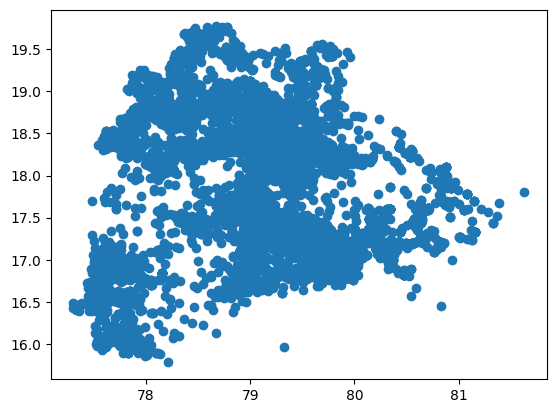

In [ ]:
plt.scatter(hs_data['Longitude'],hs_data['Latitude'])

In [ ]:
fig=px.scatter_geo(hs_data,lat='Latitude',lon='Longitude',hover_name="StateName")
fig.update_layout(title='Telangana Area',title_x=0.5)
fig.show()

In [ ]:
X=np.array(hs_data[['Longitude','Latitude']])
def kmeans(data, k):
  centroids = X[np.random.choice(X.shape[0], k, replace=False)]
  for _ in range(100):
    labels = np.argmin(np.linalg.norm(X[:, np.newaxis] - centroids, axis=2), axis=1)
    centroids = np.array([np.mean(X[labels == i], axis=0) for i in range(k)])
  return labels, centroids

CLUSTERING BASED ON NUMBER OF DISTRICTS

In [ ]:
#To find number of districts
num=len(pd.unique(hs_data['District']))
print("Number of districts:", num)

Number of districts: 33


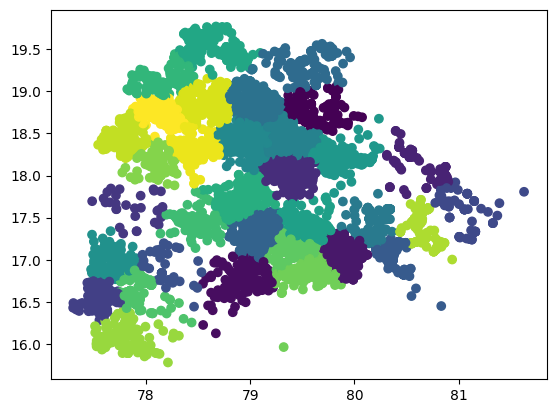

In [ ]:
labels, centroids = kmeans(X, 33)
plt.scatter(X[:,0],X[:,1],c = labels)

In [ ]:
#From here it is clear that many pincodes in Hyderabad city region, and in districts near Khammam are not availble